<a href="https://colab.research.google.com/github/Tavo826/Aprende-ML-Book-/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base de datos con análisis de personalidad de 140 famosos de Twitter

Características:

* Usuario
* op: Openess to experience
* co: Conscientiouness
* ex: Extraversion
* ag: Agreeableness
* ne: Neuroticism
* Wordcount: promedio de palabras por tweet
* Categoria: Actividad laboral
  
  1. Actor/actriz
  2. Cantante 
  3. Modelo 
  4. Tv,series 
  5. Radio 
  6. Tecnología 
  7. Deportes 
  8. Política
  9. Escritor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/analisis.csv')
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


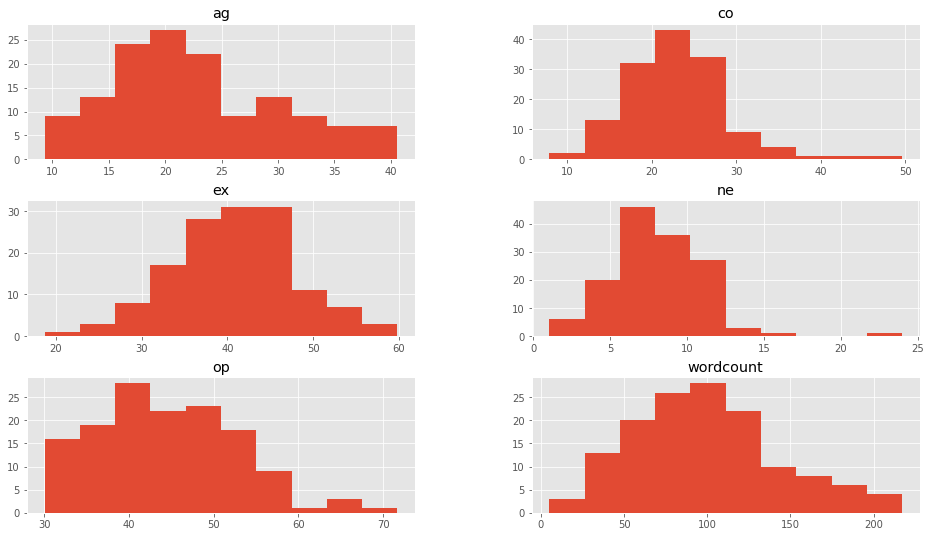

In [ ]:
#Dispersión de los datos
dataframe.drop(['categoria'],1).hist()
plt.show()

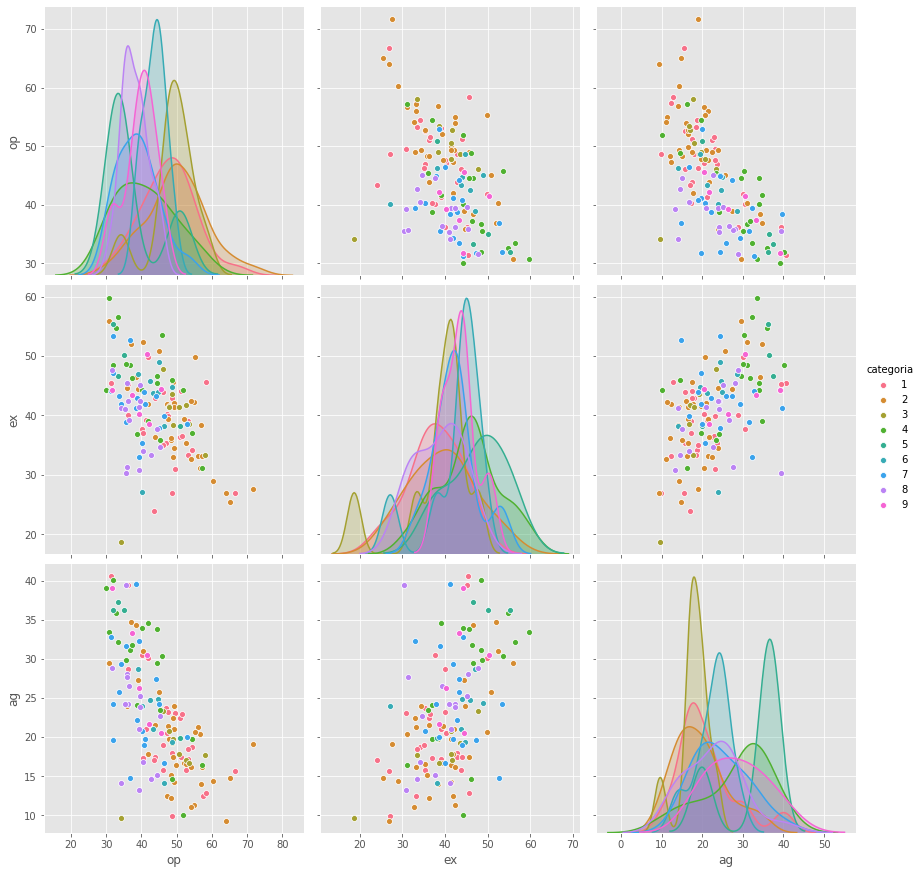

In [ ]:
# Agrupando op, ax y ag

sb.pairplot(dataframe.dropna(),
            hue='categoria',
            size=4,
            vars=['op', 'ex', 'ag'],
            kind='scatter')

### Se define la entrada

In [ ]:
X = np.array(dataframe[['op', 'ex', 'ag']])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

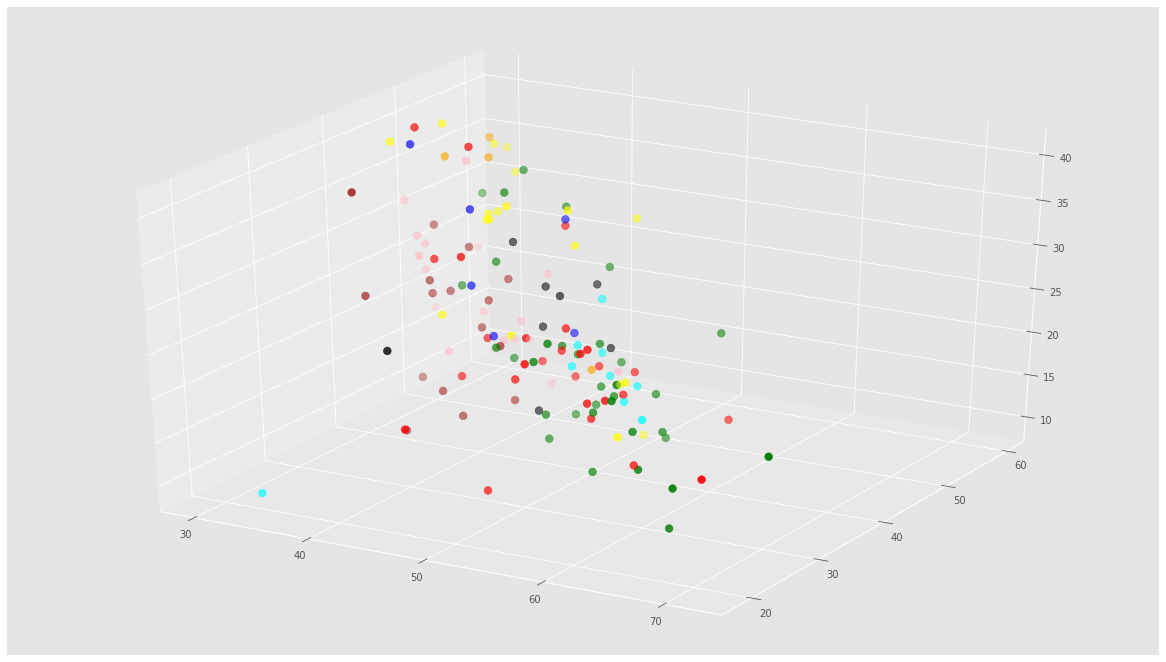

In [ ]:
#Gráfica de las categorías

fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue',
           'red',
           'green',
           'cyan',
           'yellow',
           'orange',
           'black',
           'pink',
           'brown',
           'blue', 
           'blue']

asignar = []
for row in y:
  asignar.append(colores[row])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

### Obtener el valor de K

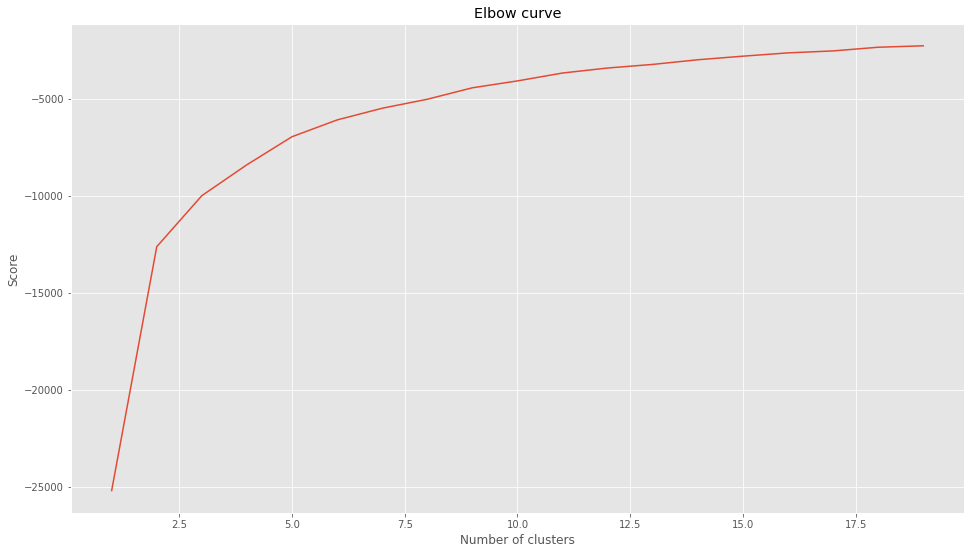

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()

### Ejecutando K-Means

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[40.14744474 43.54690971 23.11790265]
 [35.90241306 47.56828232 33.58748762]
 [58.70462307 30.53566167 15.72207033]
 [42.75925435 32.7509888  21.08881555]
 [50.42588653 40.66723528 17.30892462]]


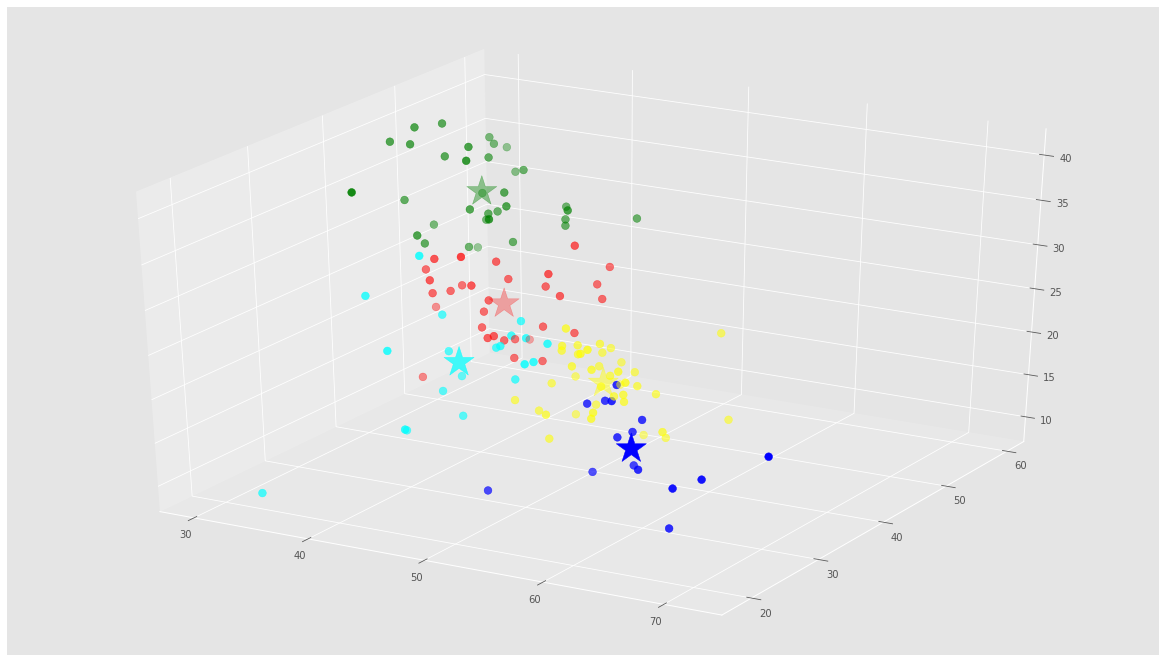

In [ ]:
# Gaficando

labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red',
           'green',
           'blue',
           'cyan',
           'yellow']
asignar = []
for row in labels:
  asignar.append(colores[row])  

fig = plt.figure()
ax = Axes3D(fig)      
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

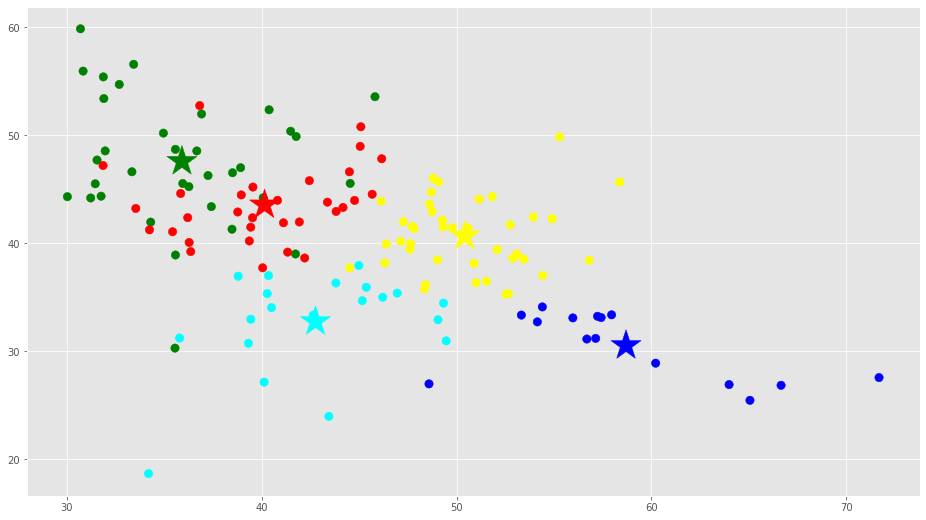

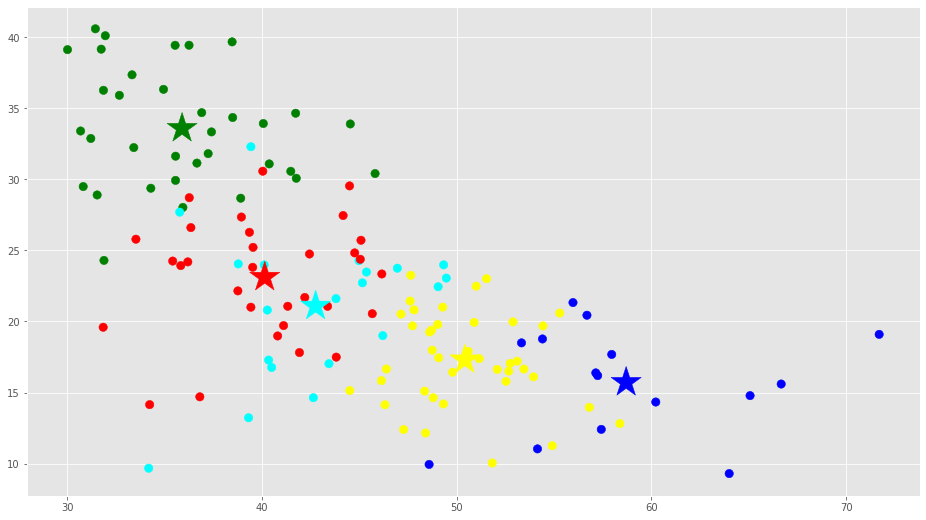

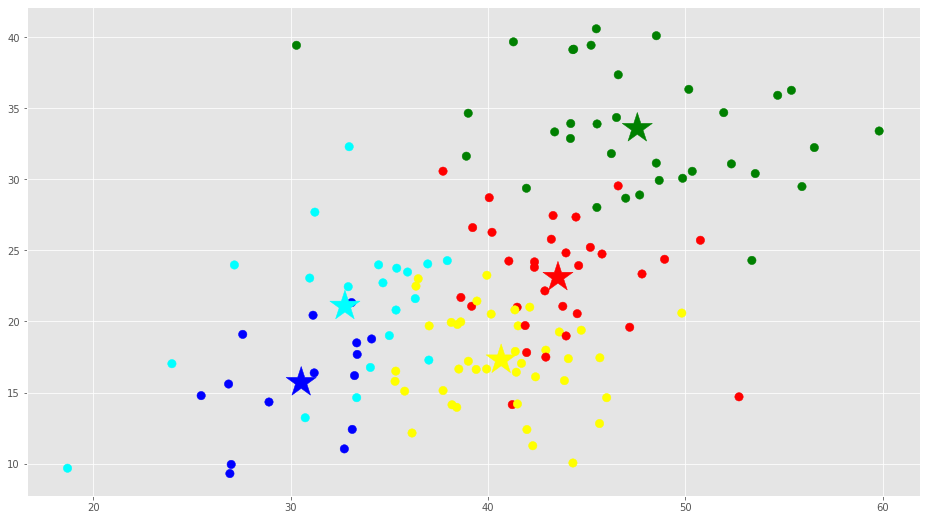

In [ ]:
# Gaficando las proyecciones

f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy = pd.DataFrame()
copy['usuario'] = dataframe['usuario'].values
copy['categoria'] = dataframe['categoria'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,31
1,green,34
2,blue,15
3,cyan,20
4,yellow,40


In [ ]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]

diversidadGrupo = pd.DataFrame()
diversidadGrupo['categoria'] = [0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad'] = group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,4.0
2,2,4.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,4.0
7,7,7.0
8,8,7.0
9,9,3.0


In [ ]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
print(closest)

users = dataframe['usuario'].values
for row in closest:
  print(users[row])

[ 64  98  82 120  21]
ierrejon
maria_patino
JudgeJudy
SarahPalinUSA
carmenelectra


## Clasificar nuevas muestras

In [ ]:
#David Guetta
X_new = np.array([[45.92, 57.74, 15.66]])

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
